In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

load cleaned data:

In [3]:
sold=pd.read_csv("clean_sold.csv")
adds=pd.read_csv("clean_kt.csv")

In [4]:
sold.head()
sold=sold.drop(["room","type"],axis=1)

In [5]:
adds.head()
adds=adds.drop(["rooms","type"],axis=1)

make layout uniform:

In [6]:
column_names=["area","rooms","sqm","price","price/sqm"]

In [7]:
adds=adds.rename(columns={"n_room":"rooms","size":"sqm","p/s":"price/sqm"})

In [8]:
adds["label"]="market"
sold["label"]="sold"
combined=pd.concat([sold,adds])

from this plot it looks as if the houses on the market have a higher sqm price than the ones sold during the last year:

<AxesSubplot:xlabel='rooms', ylabel='price/sqm'>

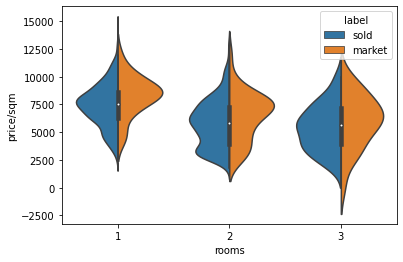

In [9]:
sns.violinplot(data=combined[combined.rooms<=3], x="rooms",y="price/sqm",hue="label",split=True)

In [10]:
average_sold=sold["price/sqm"].mean()

In [11]:
average_sold

6315.757314148681

In [12]:
average_market=adds["price/sqm"].mean()

In [13]:
average_market

6749.239925855729

let's have a look at the studio apartments:

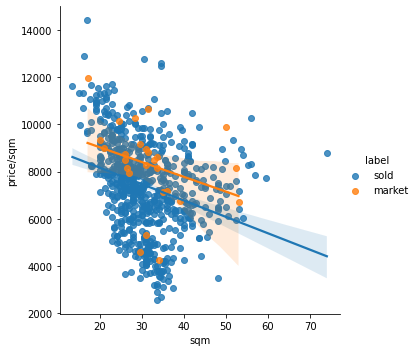

In [14]:
one_room=combined[combined.rooms==1]
sns.lmplot(data=one_room, x="sqm",y="price/sqm",hue="label")

In [15]:
len(combined[(combined.rooms==1)&(combined.label=="market")])

26

quite a low number of one room apts on the market, so not conclusive

from the heatmap we can see that the sqm price negatively correlates with the number of rooms, and also with the total size. smaller apartments with fewer rooms seem to have a higher sqm price:

<AxesSubplot:>

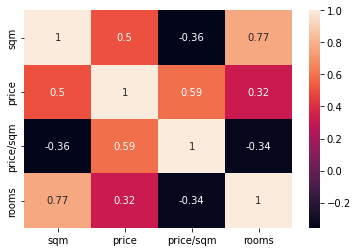

In [16]:
corre=sold.corr()
sns.heatmap(corre,annot=True)

Finally: What about the areas? was there a chanmge in most expensive/cheapest areas? I first check how many entries are in the files per area, and then group by area to get the mean sqm price per area

In [29]:
counts_sold=sold.area.value_counts()

In [28]:
counts_adds=adds.area.value_counts()

In [18]:
gs=sold.groupby("area").mean()
ga=adds.groupby("area").mean()

restrict it to areas which occur in both files:

In [19]:
merged=pd.merge(gs,ga, on="area",how="inner",suffixes=("_sold", "_adv"))

In [20]:
merged.head()

,sqm_sold,price_sold,price/sqm_sold,rooms_sold,price_adv,sqm_adv,price/sqm_adv,rooms_adv
area,,,,,,,,
Alppiharju,41.181818,285004.590909,7392.727273,1.545455,273000.000000,39.000000,7769.827586,1.5
Alppila,37.547619,257845.238095,7066.285714,1.500000,351500.000000,46.500000,7449.430199,1.5
Arabianranta,51.850000,322971.600000,6372.100000,1.900000,548000.000000,74.500000,7355.704698,3.0
Aurinkolahti,50.166667,262444.095238,5274.761905,1.857143,546000.000000,84.000000,6500.000000,3.0
Hakaniemi,48.842857,356785.714286,7341.071429,1.785714,507666.666667,67.766667,7422.474204,2.0


In [21]:
merged.describe()

,sqm_sold,price_sold,price/sqm_sold,rooms_sold,price_adv,sqm_adv,price/sqm_adv,rooms_adv
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,45.590569,272116.555411,6209.935671,1.751444,347022.034188,58.206624,6177.838213,2.191026
std,6.498953,91240.227279,1970.499693,0.263966,158799.379417,17.078750,2225.452302,0.719637
min,35.885000,129192.666667,2633.083333,1.333333,135600.000000,26.716667,2530.243132,1.000000
25%,40.832292,212782.531409,4665.921053,1.633929,220500.000000,46.750000,4134.174757,2.000000
50%,44.704762,257845.238095,6537.000000,1.750000,304500.000000,60.000000,6500.000000,2.000000
75%,49.168544,337260.391026,7681.410119,1.845281,441500.000000,68.133333,7868.673678,3.000000
max,72.000000,560000.000000,9781.333333,3.000000,848000.000000,95.000000,9493.670886,4.000000


In [71]:
cheap_sold=pd.Series(merged.nsmallest(10,"price_sold").index)
cs=counts_sold[cheap_sold].reset_index()
cheap_ads=pd.Series(merged.nsmallest(10,"price_adv").index)
ca=counts_adds[cheap_ads].reset_index()
expens_sold=pd.Series(merged.nlargest(10,"price_sold").index)
es=counts_sold[expens_sold].reset_index()
expens_adv=pd.Series(merged.nlargest(10,"price_adv").index)
ea=counts_adds[expens_adv].reset_index()

In [83]:
areas=pd.concat([cs,ca,es,ea],axis=1)


finally, a table showing the ten most expensive/cheapest areas (both sold and on the market), with the number of apartments from the respective area. "Keskusta" was for example most expensive last year and now, but the average sqm price stems from just one (clearly expensive) apartment respectively. 

In [84]:
areas.columns=["Cheapest last year","n cly","Cheapest now","n cn","Expensive last year","n ely","Expensive now","n en"]
areas

,Cheapest last year,n cly,Cheapest now,n cn,Expensive last year,n ely,Expensive now,n en
0,Siltamäki,12,Yliskylä,1,Keskusta,1,Keskusta,1
1,Kontula,33,Kontula,2,Jätkäsaari,10,Kamppi,4
2,Pihlajamäki,18,Vuosaari,3,Punavuori,69,Kalasatama,2
3,Savela,6,Malmi,1,Katajanokka,19,Arabianranta,1
4,Pukinmäki,17,Savela,1,Kalasatama,15,Aurinkolahti,1
5,Malmi,37,Kannelmäki,2,Kaartinkaupunki,6,Kaartinkaupunki,2
6,Vuosaari,54,Pihlajamäki,1,Munkkiniemi,40,Hakaniemi,3
7,Kannelmäki,34,Siltamäki,1,Hakaniemi,14,Töölö,3
8,Maunula,19,Pukinmäki,2,Töölö,28,Laakso,1
9,Laajasalo,19,Hermanni,1,Kamppi,78,Kruunuvuorenranta,1
